Before discussing MBRL, let's review the way model-free reinforcement learning manages to learn policies. This can be achieved by two main paradigms, value based methods and policy based methods. Both of them require the agent to interact directly with the world and use the feedback given by the environment (reward) to improve the learned policy directly or indirectly through value functions. One of the main bottleneck of this approach is that sometimes, interacting with the environment can be very costly, for instance in the field of robotics. Moreover, we often have very good simulators of the environment we are interested in, especially in the case of physics based problems (again, like robotics). This extra knowledge of the environment inner-workings can be exploited by model-based approaches to simulate feedback from the actual environment without having to actually deploy the agent in the environment.

In model-based reinforcement learning, we're instead trying to learn a policy through a model of the environment, which can itself be learned or updated while the agent is training. This has the main advantage of being able to simulate a lot more interactions between the agent and the environment, and opens the possibility of planning actions ahead through simulation. Planning can be used during training to improve the policy directly (this is called background planning), or at runtime to fine tune the policy outputs and plan actions ahead (for instance simulating an opponent's decisions and our responses in a game like chess).

To understand how background planning works in model-based RL, we started by implementing the most basic algorithm : Q-planning. This algorithm assumes that a good model of the world is available and is basically the exact same as Q-learning, except that all its interactions with the environment are being simulated. There is no interaction whatsoever with the real environment. In other words, Q-planning considers that it has access to a perfect model of the world and applies Q-learning to it.

For our tests, we gave Q-planning the model of our environment learned by Dyna-Q (described in the next section), and plotted the learned Q-values after 1000 steps and at the end of the training process. The results are displayed on the following images.

![Q planning 1000 steps deterministic.png](<attachment:Q planning 1000 steps deterministic.png>)

![Q planning final values deterministic.png](<attachment:Q planning final values deterministic.png>)

![Q planning results deterministic.png](<attachment:Q planning results deterministic.png>)

We also tested Q-planning on a stochastic environment too. The results are the following :

![Q planning 1000 steps stochastic.png](<attachment:Q planning 1000 steps stochastic.png>)

![Q planning final values stochastic.png](<attachment:Q planning final values stochastic.png>)

![Q planning results stochastic.png](<attachment:Q planning results stochastic.png>)

Q-planning is a lot more sample efficient than Q-learning since it doesn't need to interact with the actual environment to learn a policy. This is especially useful when the environment can be modeled but deploying a real agent in the environment is more complicated (which is the case of almost all physics based environments).

However, the result images highlight a problem of Q-planning that is the random sampling of states and actions. It is a very inefficient way to balance exploration and exploitation and therefore leads to virtually no Q-values learned after 1000 steps, which is similar to the regular Q-learning algorithm that we were expecting to beat.

Finally, Q-planning has the very obvious flaw of overfitting the model, which is an approximation of the real environment's behavior, therefore not perfect. Moreover, this only works when the environment is stationary, meaning its behavior doesn't change with time. This is especially clear in the stochastic setting, where the model given to Q-planning was deterministic and therefore a very bad model of the real environment. This unsurprisingly leads to poorer performances and highlight the necessity to have both a good model of the world and have it updated to reflect the non-stationnarities of the environment.

To deal with these shortcomings regarding the model side of Q-planning, a better algorithm that combines learning the policy and learning the world model has been developed. It is named Dyna-Q. We will present this algorithm in both its tabular and function approximation settings.



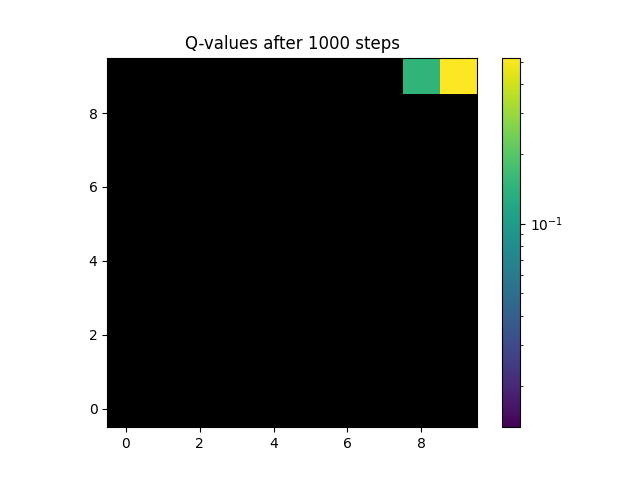
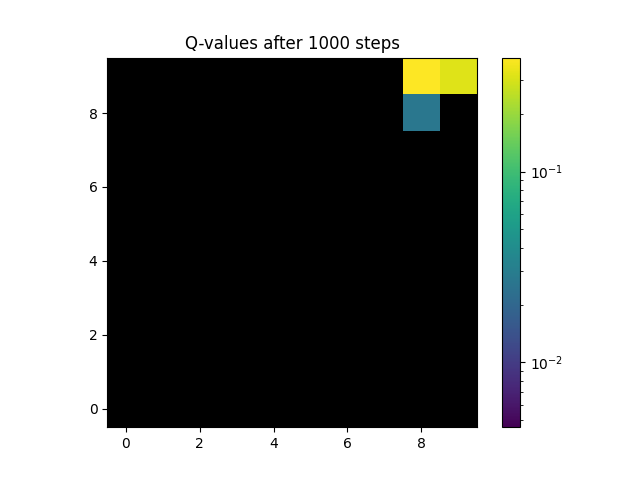
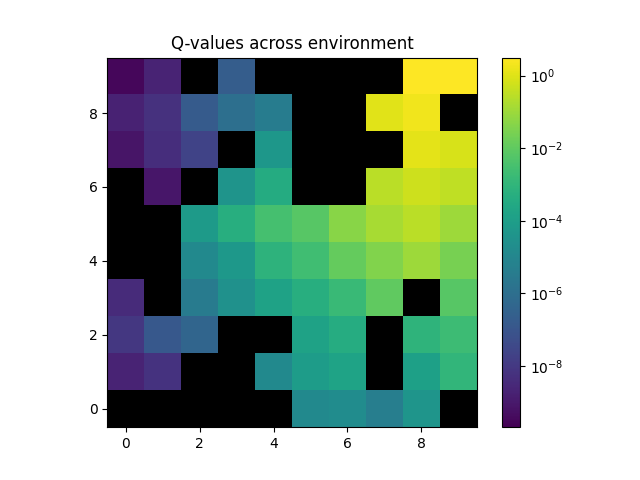
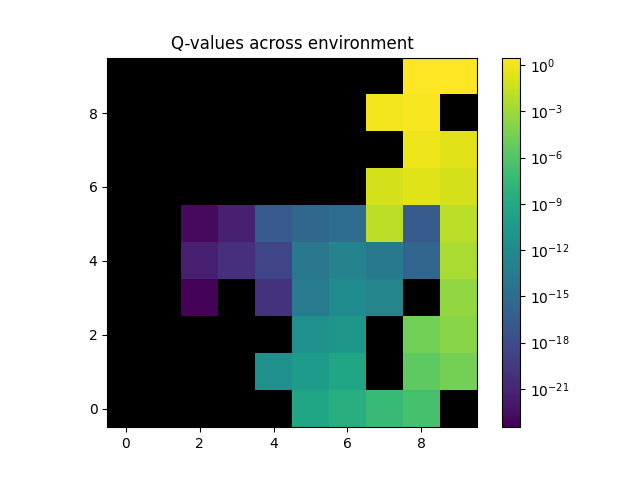
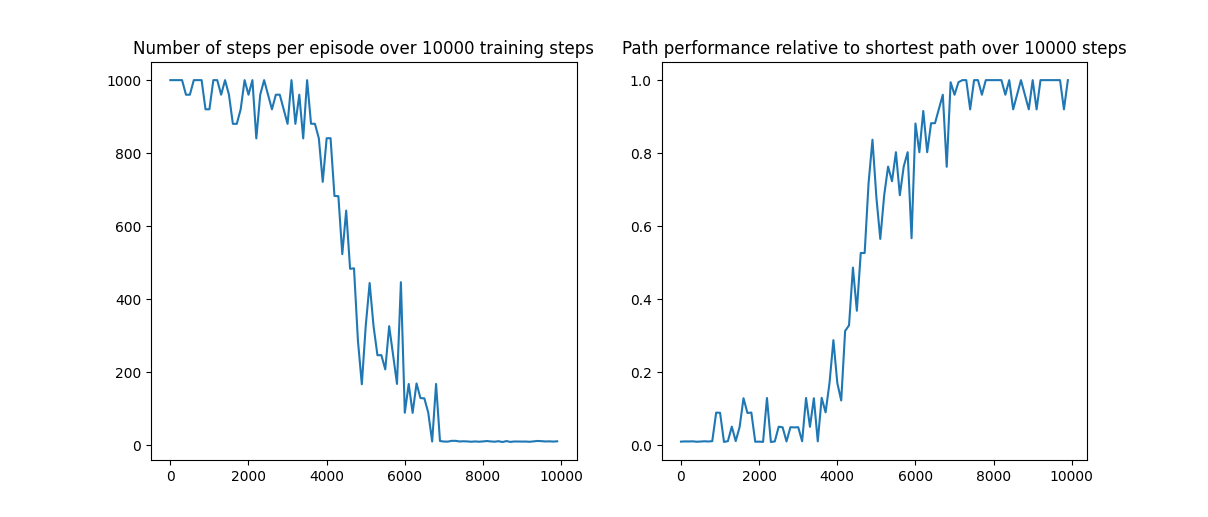
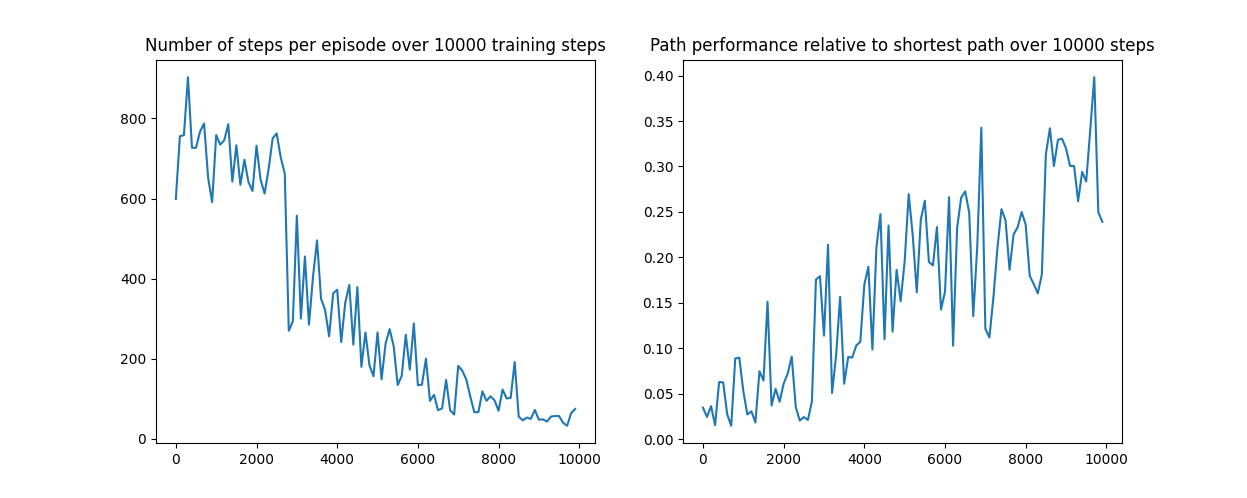